<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Cat_and_dog_classifier_with_keras_ImageDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

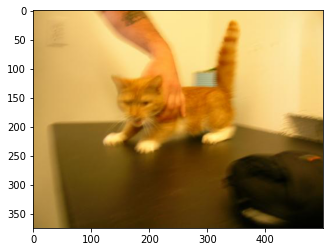

In [11]:
img = image.load_img('training/Cat/0.jpg')
plt.imshow(img)

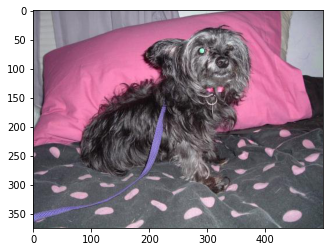

In [12]:
img = image.load_img('training/Dog/0.jpg')
plt.imshow(img)

In [9]:
cv2.imread('training/Cat/0.jpg').shape

(375, 500, 3)

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [29]:
training_dataset = train.flow_from_directory('training', target_size=(200,200), batch_size=3, class_mode='binary')
validation_dataset = train.flow_from_directory('validation', target_size=(200,200), batch_size=3, class_mode='binary')

Found 50 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [21]:
training_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [22]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

## Defining Convolutional Neural Network

In [23]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # 
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # 
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Training

In [32]:
model_fit = model.fit(training_dataset, steps_per_epoch=3, epochs=30, validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 573ms/step - loss: 0.6479 - accuracy: 0.6667 - val_loss: 0.1951 - val_accuracy: 0.9000
Epoch 2/30
3/3 [==============================] - 2s 548ms/step - loss: 0.3925 - accuracy: 0.7778 - val_loss: 0.2837 - val_accuracy: 0.9000
Epoch 3/30
3/3 [==============================] - 1s 539ms/step - loss: 0.2511 - accuracy: 0.8750 - val_loss: 0.2319 - val_accuracy: 0.9500
Epoch 4/30
3/3 [==============================] - 1s 545ms/step - loss: 0.4030 - accuracy: 0.7500 - val_loss: 0.1864 - val_accuracy: 0.9500
Epoch 5/30
3/3 [==============================] - 2s 591ms/step - loss: 0.1895 - accuracy: 0.8889 - val_loss: 0.2109 - val_accuracy: 0.9000
Epoch 6/30
3/3 [==============================] - 2s 557ms/step - loss: 0.2009 - accuracy: 1.0000 - val_loss: 0.1833 - val_accuracy: 0.9500
Epoch 7/30
3/3 [==============================] - 2s 561ms/step - loss: 0.1217 - accuracy: 1.0000 - val_loss: 0.1684 - val_accuracy: 0.9500
Epoch 8/30
3/3 [====

Cat


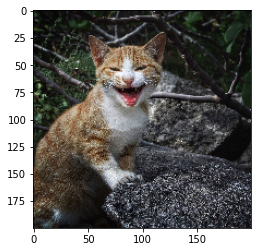

Dog


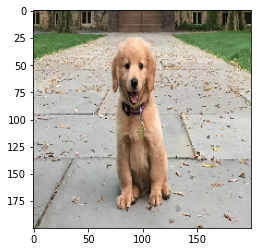

In [52]:
path = "testing"

for i in os.listdir(path):
  test_img = image.load_img(path + "//" + i, target_size=(200,200))
  X = image.img_to_array(test_img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])

  prediction = model.predict(images)
  print(list(training_dataset.class_indices.keys())[prediction[0][0].astype(int)])
  
  plt.imshow(test_img)
  plt.show()

In [53]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

Dog


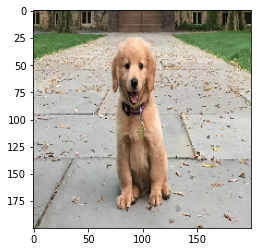

In [55]:
model = pickle.load(open('model.pkl', 'rb'))
test_img = image.load_img('testing/test2.jpg', target_size=(200,200))
X = image.img_to_array(test_img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])

prediction = model.predict(images)
print(list(training_dataset.class_indices.keys())[prediction[0][0].astype(int)])

plt.imshow(test_img)
plt.show()